In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("aapl_no_dates.csv")
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


[pandas date_range() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) allows us to generate date. Or , It Returns a fixed frequency DatetimeIndex, with day (calendar) as the default frequency.

To learn more about the frequency strings, [see this link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases).

In [4]:
rng = pd.date_range(start = '2017/06/01', end = '2017/06/30', freq = 'B')
rng

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

Arguments taken :
- __start :__ Start date
- __end :__ End date
- __freq :__ [time series frequencies](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)  

Here __'B'__ is taken as fequency, it implies Business days. It includes business days or weekdays and excludes weekends.

Now, set these dates as index of df.

In [5]:
df.set_index(rng, inplace = True)
df

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-12,145.74,146.09,142.51,145.42,72307330
2017-06-13,147.16,147.45,145.15,146.59,34165445
2017-06-14,147.50,147.50,143.84,145.16,31531232


## Benefits of datetime index.

Eg: to create chart of closing stock prices.

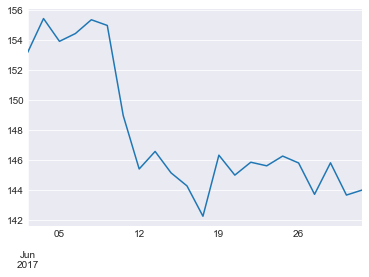

In [6]:
df.Close.plot();

To get data for 1st 10 days i.e., to get data for range of data.

In [7]:
df["2017-06-01":"2017-06-10"]

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657


To get average of closing price for first 10 days.

In [9]:
df["2017-06-01":"2017-06-10"].Close.mean()

153.7642857142857

## Finding missing dates from datetime index

Lets say we want our df to have prices on weekends also.
- No data for saturdaya and sunday not given.
- We can assume that prices on Friday were the prices on weekends.
- This can be done using __pandas as_freq() method__.

##### pandas.df.as_freq() method
- It allows us to regenerate our df according to that frequency.
- The new frequency we want is Days 'D' and it includes weekends.
- And method that we want to use, to carry over the prices is padding i.e., __pad__ . So, prices on friday is carried over to saturday and sunday.

In [11]:
df.asfreq('D', method = 'pad')

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-10,155.19,155.19,146.02,148.98,64882657


In [12]:
# Will show only weekly prices
df.asfreq('W', method = 'pad')

,Open,High,Low,Close,Volume
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-11,155.19,155.19,146.02,148.98,64882657
2017-06-18,143.78,144.50,142.20,142.27,50361093
2017-06-25,145.13,147.16,145.11,146.28,35439389


In [13]:
# Will show only hourly prices
df.asfreq('H', method = 'pad')

,Open,High,Low,Close,Volume
2017-06-01 00:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 01:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 02:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 03:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 04:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 05:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 06:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 07:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 08:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 09:00:00,153.17,153.33,152.22,153.18,16404088


## Generating datetime index with periods arguments.
- For __date_range() function__ : Can be used only when we know only about the __start date__ but know nothing about the __end date__. But know how many periods or datetime index we want in this range.

Below example : 72 business days i.e., saturday and sunday are excluded.

In [14]:
rng = pd.date_range(start = '1/1/2017', periods=72, freq = 'B')
rng

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23',
               '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
               '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02',
               '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08',
               '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14',
               '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-20',
               '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14',
               '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20',
      

This could be useful in generating test/fake data.

In [16]:
import numpy as np
np.random.randint(1,10,len(rng))

array([9, 4, 3, 3, 3, 8, 3, 7, 7, 5, 4, 6, 5, 8, 6, 3, 5, 5, 8, 9, 1, 6, 2,
       2, 2, 3, 2, 7, 9, 5, 3, 6, 4, 8, 9, 3, 6, 2, 9, 8, 4, 2, 1, 1, 1, 8,
       8, 9, 6, 9, 9, 5, 5, 1, 7, 1, 3, 7, 8, 3, 9, 4, 8, 3, 7, 4, 3, 5, 7,
       7, 3, 2])

We can generate pandas series out of this  i.e., we will have random numbers between 1 to 10 for all these dates.

In [19]:
ts = pd.Series(np.random.randint(1,10,len(rng)), index=rng)
ts.head(10)

2017-01-02    9
2017-01-03    7
2017-01-04    6
2017-01-05    8
2017-01-06    8
2017-01-09    2
2017-01-10    7
2017-01-11    7
2017-01-12    9
2017-01-13    1
Freq: B, dtype: int32

## IMP note

Date ranges wont handle holidays specific to any calendar. Eg: 15th August (Independance day) wont be given as holiday.